# Fundamentos IA y Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 4
<p>Modelos de Regresión y Clasificación II.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
import numpy as np
import math

# Trabajar con dataset
import pandas as pd
from sklearn import metrics

# Presentación de datos
import seaborn as sns
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PROBLEMA I.-</b><br></div>

Dada la siguiente red neuronal entrenada:

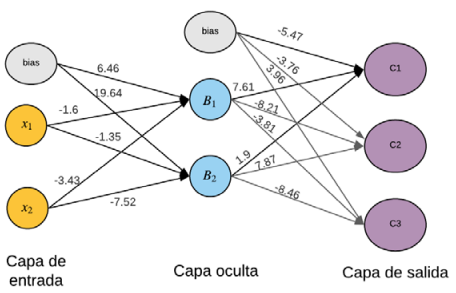

Se pide hallar:
- Predicciones del modelo para el conjunto de test dado.
- Evaluar el rendimiento del clasificador.

In [3]:
p1_test=pd.read_csv('l4p1_test.csv')
p1_test

,x1,x2,clase
0,1.5,0.2,1
1,1.4,0.3,1
2,1.6,0.4,1
3,1.1,0.1,2
4,4.3,1.3,1
5,3.0,1.1,2
6,4.9,2.0,2
7,6.1,1.9,2
8,4.4,1.2,3
9,5.9,2.1,1


<div style="font-size:14px; text-align:justify"><b>1: </b>Calcular el modelo de regresión logistica.</div>

El primer paso, será calcular la función de transferencia B1 y B2 y la probabilidad para cada clase. Realizado mediante una función sigmoidal.

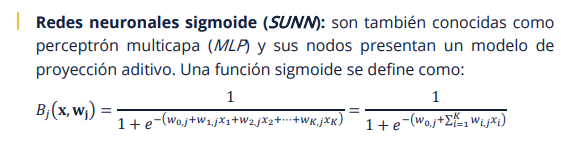

In [2]:
p1_train = pd.read_csv('l3p1_train.csv')

p1_train

,x1,x2,y
0,60,1,120
1,55,2,125
2,70,1,130
3,60,2,112
4,62,1,122
5,70,2,135
6,60,3,128
7,80,1,140
8,80,2,150
9,85,3,160


<div style="font-size:14px; text-align:justify"><b>1: </b>Calcular el modelo de regresión lineal simple de 𝑌 en función de 𝑋1.</div>

In [3]:
# Escalado de parametros entre 0 y 1 para obtener valores del mismo orden.
def escalar(data, minimo, maximo):        
    return [(i-minimo)/(maximo - minimo) for i in data]

# Dataframe apartado
p1_1 = p1_train[['x1', 'y']].copy()

# Escalado del dataframe
p1_1['x1'] = escalar(p1_1['x1'], p1_train['x1'].min(), p1_train['x1'].max())
p1_1

,x1,y
0,0.166667,120
1,0.000000,125
2,0.500000,130
3,0.166667,112
4,0.233333,122
5,0.500000,135
6,0.166667,128
7,0.833333,140
8,0.833333,150
9,1.000000,160


In [4]:
# Obtener las medias de los valores de atributo y objetivo
mean_y_x1 = [round(p1_1['y'].mean(),4), round(p1_1['x1'].mean(),4)]

print(f'µ_y_x1: {mean_y_x1}')

# Obtener la matriz de covarianzas
def covarianza(data1, data2):
    sum_covar=0
    for v1, v2 in zip(data1, data2):
        sum_covar += (v1 - data1.mean())*(v2 - data2.mean())
        
    return sum_covar/(len(data1))

matriz_covarianzas = np.asarray([[covarianza(p1_1['y'], p1_1['y']),covarianza(p1_1['y'], p1_1['x1'])],
                                 [covarianza(p1_1['x1'], p1_1['y']),covarianza(p1_1['x1'], p1_1['x1'])]])

print(f'Σ_y_x1: {matriz_covarianzas}')

µ_y_x1: [132.2, 0.44]
Σ_y_x1: [[1.89360000e+02 4.09533333e+00]
 [4.09533333e+00 1.09066667e-01]]


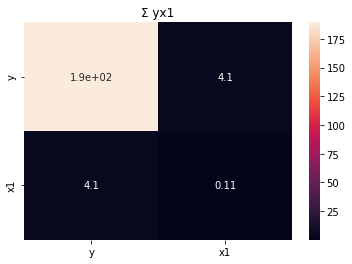

In [5]:
sns.heatmap(matriz_covarianzas, annot=True,
            yticklabels=['y', 'x1'],
            xticklabels=['y', 'x1']).set(title='Σ yx1')
plt.show()

Calcular el modelo mediante la expresión:<br>
Y=ß0 + ß1·X1

Donde el coeficiente de regresión será:<br>
ß1 = S_x1,y/S²x1<br>
ß0 = Y - ß1·X1

In [6]:
# Calculo del modelo mediante ecuación Y = ß0 + ß1·X1
def adjunto(matriz, i, j):
    '''
    Calculo del valor adjunto de una matriz
    :param i: Indice de la fila
    :param j: Indice de la columna
    '''
    # Calcular el signo de acuerdo con la posición del elemento en la matriz
    signo = -1**(i+j)
    
    # Eliminar fila y columna 'i' y 'j'
    # Convertir los indices de matriz en indice de operación Numpy
    i -= 1
    j -= 1
    ma = np.delete(matriz, i, axis=0)
    ma = np.delete(ma, j, axis=1)
    
    # Calculo del determinante de la matriz resulante
    det = np.linalg.det(ma)
    
    return signo * det

m1_B1 = adjunto(matriz_covarianzas,1,2)/adjunto(matriz_covarianzas,1,1)
m1_B0 = p1_1['y'].mean() - m1_B1 * p1_1['x1'].mean()
        
m1_B0, m1_B1

(115.67848410757945, 37.54889975550121)

El modelo será **Y = 115.68 + 37.55·X1**

<div style="font-size:14px; text-align:justify"><b>2: </b>Calcular el modelo de regresión lineal simple de 𝑌 en función de 𝑋2.</div>

In [7]:
# Escalado de parametros entre 0 y 1 para obtener valores del mismo orden.
# Dataframe apartado
p1_2 = p1_train[['x2', 'y']].copy()

# Escalado del dataframe
p1_2['x2'] = escalar(p1_2['x2'], p1_train['x2'].min(), p1_train['x2'].max())
p1_2

,x2,y
0,0.0,120
1,0.5,125
2,0.0,130
3,0.5,112
4,0.0,122
5,0.5,135
6,1.0,128
7,0.0,140
8,0.5,150
9,1.0,160


In [8]:
# Obtener las medias de los valores de atributo y objetivo
mean_y_x2 = [round(p1_2['y'].mean(),4), round(p1_2['x2'].mean(),4)]

print(f'µ_y_x2: {mean_y_x2}')

matriz_covarianzas = np.asarray([[covarianza(p1_2['y'], p1_2['y']),covarianza(p1_2['y'], p1_2['x2'])],
                                 [covarianza(p1_2['x2'], p1_2['y']),covarianza(p1_2['x2'], p1_2['x2'])]])

print(f'Σ_y_x2: {matriz_covarianzas}')

µ_y_x2: [132.2, 0.4]
Σ_y_x2: [[1.8936e+02 2.0200e+00]
 [2.0200e+00 1.4000e-01]]


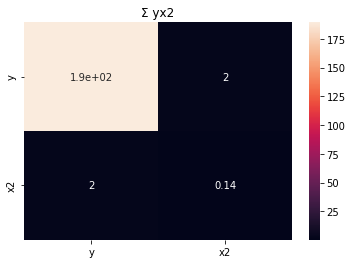

In [9]:
sns.heatmap(matriz_covarianzas, annot=True,
            yticklabels=['y', 'x2'],
            xticklabels=['y', 'x2']).set(title='Σ yx2')
plt.show()

Calcular el modelo mediante la expresión:<br>
Y=ß0 + ß1·X2

Donde el coeficiente de regresión será:<br>
ß1 = S_x2,y/S²x2<br>
ß0 = Y - ß1·X2

In [10]:
# Calculo del modelo mediante ecuación Y = ß0 + ß1·X1
m2_B1 = adjunto(matriz_covarianzas,1,2)/adjunto(matriz_covarianzas,1,1)
m2_B0 = p1_2['y'].mean() - m2_B1 * p1_2['x2'].mean()
        
m2_B0, m2_B1

(126.42857142857142, 14.428571428571425)

El modelo será **Y = 12643 + 14.43·X2**

<div style="font-size:14px; text-align:justify"><b>3: </b>El modelo de regresión lineal múltiple de 𝑌 en función de 𝑋1 y 𝑋2.</div>

In [11]:
# Escalado de parametros entre 0 y 1 para obtener valores del mismo orden.
# Dataframe apartado
p1_3 = p1_train.copy()

# Escalado del dataframe
p1_3['x1'] = p1_1['x1']
p1_3['x2'] = p1_2['x2']
p1_3

,x1,x2,y
0,0.166667,0.0,120
1,0.000000,0.5,125
2,0.500000,0.0,130
3,0.166667,0.5,112
4,0.233333,0.0,122
5,0.500000,0.5,135
6,0.166667,1.0,128
7,0.833333,0.0,140
8,0.833333,0.5,150
9,1.000000,1.0,160


In [12]:
# Obtener las medias de los valores de atributo y objetivo
mean_y_x1_x2 = [round(p1_3['y'].mean(),4), round(p1_3['x1'].mean(),4), round(p1_3['x2'].mean(),4)]

print(f'µ_y_x1_x2: {mean_y_x1_x2}')

matriz_covarianzas = np.asarray([[covarianza(p1_3['y'], p1_3['y']),covarianza(p1_3['y'], p1_3['x1']),covarianza(p1_3['y'], p1_3['x2'])],
                                 [covarianza(p1_3['x1'], p1_3['y']),covarianza(p1_3['x1'], p1_3['x1']),covarianza(p1_3['x1'], p1_3['x2'])],
                                 [covarianza(p1_3['x2'], p1_3['y']),covarianza(p1_3['x2'], p1_3['x1']),covarianza(p1_3['x2'], p1_3['x2'])]])

print(f'Σ_y_x1_x2: {matriz_covarianzas}')

µ_y_x1_x2: [132.2, 0.44, 0.4]
Σ_y_x1_x2: [[1.89360000e+02 4.09533333e+00 2.02000000e+00]
 [4.09533333e+00 1.09066667e-01 1.56666667e-02]
 [2.02000000e+00 1.56666667e-02 1.40000000e-01]]


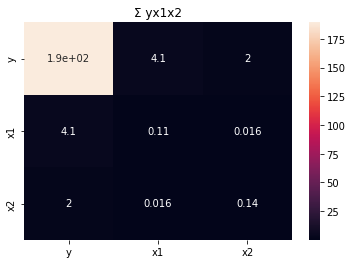

In [13]:
sns.heatmap(matriz_covarianzas, annot=True,
            yticklabels=['y', 'x1', 'x2'],
            xticklabels=['y', 'x1', 'x2']).set(title='Σ yx1x2')
plt.show()

Calcular el modelo mediante la expresión:<br>
Y=ß0 + ß1·X1 + ß2·X2

Donde el coeficiente de regresión será:<br>
ß1 = - (Adj_1,i+1 / Adj_1+1)<br>
ß0 = Y - ß1·X1 - ß2·X0

In [14]:
# Calculo del modelo mediante ecuación Y = ß0 + ß1·X1 + ß2·X2
m3_B1 = - adjunto(matriz_covarianzas,1,2)/adjunto(matriz_covarianzas,1,1)
m3_B2 = - adjunto(matriz_covarianzas,1,3)/adjunto(matriz_covarianzas,1,1)
m3_B0 = p1_2['y'].mean() - m3_B1 * p1_3['x1'].mean() - m3_B2 * p1_3['x2'].mean()
        
m3_B0, m3_B1, m3_B2

(143.9071035018304, -36.055910956624636, 10.39374329771105)

El modelo será **Y = 143.91 - 36.06·X1 + 10.39·X2**

<div style="font-size:14px; text-align:justify"><b>4: </b>Validar cada modelo con el siguiente conjunto de test.</div>

In [15]:
# Obtención de los valores de test
p1_test = pd.read_csv('l3p1_test.csv')

# Escalado de los atributos entre 0 y 1 según los máximos del train
p1_test['x1'] = escalar(p1_test['x1'], p1_train['x1'].min(), p1_train['x1'].max())
p1_test['x2'] = escalar(p1_test['x2'], p1_train['x2'].min(), p1_train['x2'].max())

p1_test

,x1,x2,y
0,0.100000,0.0,120
1,-0.166667,1.0,128
2,0.833333,0.0,140
3,0.333333,0.5,115
4,0.000000,0.0,120
5,0.666667,0.5,145
6,0.000000,1.0,125
7,0.833333,1.0,170
8,0.500000,0.0,135
9,0.666667,1.0,155


In [16]:
# Relizar predicciones con las funciones para cada modelo
def reg_simple(b0, b1, x):
    return b0 + b1 * x

def reg_multiple(x1, x2):
    return m3_B0 + m3_B1 * x1 + m3_B2 * x2

In [17]:
# Predicciones Modelo 1
pred_m1=[reg_simple(m1_B0, m1_B1, x)  for x in p1_test['x1']]
# Predicciones Modelo 2
pred_m2=[reg_simple(m2_B0, m2_B1, x)  for x in p1_test['x2']]
# Predicciones Modelo 3
pred_m3=[reg_multiple(x1, x2)  for x1, x2 in zip(p1_test['x1'], p1_test['x2'])]

# Muestra de resultados
p1_preds=pd.DataFrame({'y_m1':pd.Series(pred_m1),'y_m2':pd.Series(pred_m2),
                       'y_m3':pd.Series(pred_m3),'y':p1_test['y']})
p1_preds

,y_m1,y_m2,y_m3,y
0,119.433374,126.428571,140.301512,120
1,109.420334,140.857143,160.310165,128
2,146.969234,126.428571,113.860511,140
3,128.194784,133.642857,137.085338,115
4,115.678484,126.428571,143.907104,120
5,140.711084,133.642857,125.066701,145
6,115.678484,140.857143,154.300847,125
7,146.969234,140.857143,124.254254,170
8,134.452934,126.428571,125.879148,135
9,140.711084,140.857143,130.263573,155


In [18]:
# Calcular los residuos ei = yi − y_pred_i
e_m1=[y-y_pred for y, y_pred in zip(p1_preds['y'],p1_preds['y_m1'])]
e_m2=[y-y_pred for y, y_pred in zip(p1_preds['y'],p1_preds['y_m2'])]
e_m3=[y-y_pred for y, y_pred in zip(p1_preds['y'],p1_preds['y_m3'])]

# Muestra de resultados
e_preds=pd.DataFrame({'e_m1':pd.Series(e_m1),'e_m2':pd.Series(e_m2),
                       'e_m3':pd.Series(e_m3)})
e_preds

,e_m1,e_m2,e_m3
0,0.566626,-6.428571,-20.301512
1,18.579666,-12.857143,-32.310165
2,-6.969234,13.571429,26.139489
3,-13.194784,-18.642857,-22.085338
4,4.321516,-6.428571,-23.907104
5,4.288916,11.357143,19.933299
6,9.321516,-15.857143,-29.300847
7,23.030766,29.142857,45.745746
8,0.547066,8.571429,9.120852
9,14.288916,14.142857,24.736427


In [19]:
# Calcular métricas del modelo
metrics_pred=pd.DataFrame({'Métrica':['M1','M2','M3'],'MAE':np.NaN, 
                      'MSE':np.NaN, 'RMSE':np.NaN, 'R²':np.NaN}
                    ).set_index('Métrica')

# MAE: Mean Absolute Error
metrics_pred.loc['M1','MAE']=metrics.mean_absolute_error(p1_preds['y'], p1_preds['y_m1'])
metrics_pred.loc['M2','MAE']=metrics.mean_absolute_error(p1_preds['y'], p1_preds['y_m2'])
metrics_pred.loc['M3','MAE']=metrics.mean_absolute_error(p1_preds['y'], p1_preds['y_m3'])
# MSE: Mean Squared Error
metrics_pred.loc['M1','MSE']=metrics.mean_squared_error(p1_preds['y'], p1_preds['y_m1'])
metrics_pred.loc['M2','MSE']=metrics.mean_squared_error(p1_preds['y'], p1_preds['y_m2'])
metrics_pred.loc['M3','MSE']=metrics.mean_squared_error(p1_preds['y'], p1_preds['y_m3'])
# RMSE: Root Mean Squared Error
metrics_pred.loc['M1','RMSE']=math.sqrt(metrics_pred.loc['M1','MSE'])
metrics_pred.loc['M2','RMSE']=math.sqrt(metrics_pred.loc['M2','MSE'])
metrics_pred.loc['M3','RMSE']=math.sqrt(metrics_pred.loc['M3','MSE'])
# R²: Coefficient of determination
def r_pearson(pred,obj):
    sum_covar = 0
    pred_var = 0
    obj_var = 0
    for y_pred, y in zip(pred, obj):
        sum_covar += (y_pred - pred.mean())*(y - obj.mean())
        pred_var += (y_pred - pred.mean())**2
        obj_var += (y - obj.mean())**2
        
    return round((sum_covar**2/(pred_var*obj_var)) ,10)

metrics_pred.loc['M1','R²']=r_pearson(p1_preds['y'], p1_preds['y_m1'])
metrics_pred.loc['M2','R²']=r_pearson(p1_preds['y'], p1_preds['y_m2'])
metrics_pred.loc['M3','R²']=r_pearson(p1_preds['y'], p1_preds['y_m3'])

metrics_pred

,MAE,MSE,RMSE,R²
Métrica,,,,
M1,9.510901,142.704714,11.945908,0.591107
M2,13.700000,228.292857,15.109363,0.180534
M3,25.358078,724.231287,26.911546,0.326809


Según las métricas, el mejor es el **Modelo 1**. Esto se debe a que la variable *X2* no es un buen predictor para el modelo, aunque si tiene cierto peso en el modelo de regresión múltiple 3.

<div style="font-size:14px; text-align:justify"><b>PROBLEMA II.-</b><br></div>

Haciendo uso de la base de datos Iris vista anteriormente, se ha ejecutado un algoritmo para estimar los parámetros de una regresión logística múltiple.<br>
Como el problema tiene tres clases: setosa (1), versicolor (2) y virgínica (3), se han generado los dos modelos siguientes:<br>
𝑓1(𝑿, 𝛽1) = 541.0741 – 33.121𝑋1 − 10.2824𝑋2 − 38.5734𝑋3 − 90.4374𝑋4<br>
𝑓2(𝑿,𝜷𝟐) = 501.1562 − 26.3497𝑋1 − 24.2689𝑋2 − 10.7613𝑋3 − 130.0915𝑋4

<div style="font-size:14px; text-align:justify"><b>1: </b>Hallar las predicciones del modelo para el siguiente conjunto de test.</div>

In [20]:
p2_test=pd.read_csv('l3p2_test.csv')
p2_test

,x1,x2,x3,x4,clase
0,4.6,3.2,1.4,0.2,1
1,5.3,3.7,1.5,0.2,1
2,5.7,4.4,1.5,0.4,1
3,5.0,3.5,1.6,0.6,2
4,5.5,2.5,4.0,1.3,2
5,5.7,3.0,4.2,1.2,2
6,5.7,2.8,4.1,1.3,3
7,5.8,2.7,5.1,1.9,3
8,6.3,2.5,5.0,1.9,3
9,5.9,3.0,5.1,1.8,3


In [21]:
# Evaluación de las funciones para cada clase.
# Nota: Para la probabilidad de pertenencia a la clase 3, será la diferencia a 1 del sumatorio de las otras.
def f1(x1,x2,x3,x4):
    return 541.0741 - 33.121*x1 - 10.2824*x2 - 38.5734*x3 - 90.4374*x4

def f2(x1, x2, x3, x4):
    return 501.1562 - 26.3497*x1 - 24.2689*x2 - 10.7613*x3 - 130.0915*x4

def probabilidad(modelo, sumatorio):
    return round(modelo/(1+sumatorio),0)


# Dataframe de resultados
p3_pred=pd.DataFrame({'Patron':range(1,11),'e^f1':np.NaN, 'e^f2':np.NaN, 'Σe^ft':np.NaN,
                     'p(Y=1|X)':np.NaN, 'p(Y=2|X)':np.NaN, 'p(Y=3|X)':np.NaN,
                     'Clase Predicha':np.NaN, 'Clase Real':p2_test['clase']}).set_index('Patron')

# Evaluación de las funciones de cada modelo
def pred(pred1, pred2, pred3):
    '''
    Obtener la prediccion de acuerdo con la probabilidad de pertenecer a la clase
    '''
    predictions=[]
    for x1, x2, x3 in zip(pred1, pred2, pred3):
        if x1 == 1.0:
            predictions.append(1)
        elif x2 == 1.0:
            predictions.append(2)
        elif x3 == 1.0:
            predictions.append(3)
    
    return predictions
    
    
p3_pred['e^f1']=[math.exp(f1(x1, x2, x3, x4)) for x1, x2, x3, x4 in zip(p2_test['x1'], p2_test['x2'], p2_test['x3'], p2_test['x4'])]
p3_pred['e^f2']=[math.exp(f2(x1, x2, x3, x4)) for x1, x2, x3, x4 in zip(p2_test['x1'], p2_test['x2'], p2_test['x3'], p2_test['x4'])]
p3_pred[p3_pred.columns[2]]=p3_pred[['e^f1','e^f2']].sum(axis=1) # Sumatorio por filas de las columnas de función
p3_pred['p(Y=1|X)']=[probabilidad(x,sumatorio) for x, sumatorio in zip(p3_pred['e^f1'], p3_pred['Σe^ft'])]
p3_pred['p(Y=2|X)']=[probabilidad(x,sumatorio) for x, sumatorio in zip(p3_pred['e^f2'], p3_pred['Σe^ft'])]
p3_pred['p(Y=3|X)']=1-p3_pred[['p(Y=1|X)','p(Y=2|X)']].sum(axis=1) # Sumatorio por filas de las columnas de función
p3_pred['Clase Predicha']=pred(p3_pred['p(Y=1|X)'], p3_pred['p(Y=2|X)'], p3_pred['p(Y=3|X)'])

p3_pred

,e^f1,e^f2,Σe^ft,p(Y=1|X),p(Y=2|X),p(Y=3|X),Clase Predicha,Clase Real
Patron,,,,,,,,
1,1.658002e+123,2.747976e+113,1.658002e+123,1.0,0.0,0.0,1,1
2,1.748162e+109,4.912023e+99,1.748162e+109,1.0,0.0,0.0,1,1
3,3.218616e+92,2.731178e+76,3.218616e+92,1.0,0.0,0.0,1,1
4,1.161911e+97,1.464615e+82,1.161911e+97,1.0,0.0,0.0,1,2
5,4.363034e+26,1.654314e+36,1.654314e+36,0.0,1.0,0.0,2,2
6,1.280394e+22,2.371783e+33,2.371783e+33,0.0,1.0,0.0,2,2
7,5.598049e+20,1.998021e+30,1.998021e+30,0.0,1.0,0.0,2,3
8,2.742053e-21,4.343567e-09,4.343567e-09,0.0,0.0,1.0,3,3
9,6.520509e-26,3.100338e-12,3.100338e-12,0.0,0.0,1.0,3,3


<div style="font-size:14px; text-align:justify"><b>2: </b>Evaluar el rendimiento del clasificador en dicho conjunto.</div>

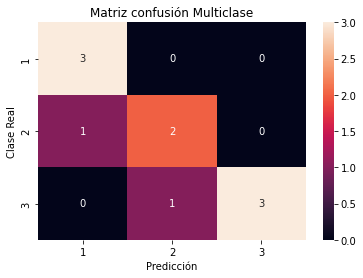

CCR: 0.8
Kappa: 0.70


In [22]:
# Calcular matriz de confusión y las métricas CCR y Kappa para el modelo.
# Matriz de confusión
def cm_values(pred, real):
    '''
    Cálculo de las celdas de la matriz de confusión.
    :param pred: Valores predecidos.
    :param real: Valores reales.
    '''
    clases=real.unique() # Total de clases en set
    matrix=[] # Resultado de valores de matriz
    clase_valores=[0 for i in range(len(clases))] # Valores para cada clase
    
    for clase in range(len(clases)):
        for y, y_pred in zip(real, pred):
            if y == clases[clase]:
                if y_pred == y:
                    # El valor de la diagonal de la matriz como positivo
                    clase_valores[clase] += 1
                elif y_pred != y:
                    # Recorrer resto de clases y ver cual coincide
                    for x in clases:
                        if y_pred == x:
                            clase_valores[x-1] += 1
                            
        # Agregar lista de valores de la clase vista
        matrix.append(clase_valores)
        clase_valores=[0 for i in range(len(clases))] # Reset de lista de valores
        
    # Ploteado de matriz
    sns.heatmap(matrix, annot=True, 
                xticklabels= clases, yticklabels= clases).set(
        title='Matriz confusión Multiclase', xlabel='Predicción', ylabel='Clase Real')
    plt.show()
    
    return

        
cm_values(p3_pred['Clase Predicha'],p3_pred['Clase Real'])

# Accuracy del modelo. CCR
print(f"CCR: {metrics.accuracy_score(p3_pred['Clase Real'], p3_pred['Clase Predicha'])}")
print(f"Kappa: {metrics.cohen_kappa_score(p3_pred['Clase Real'], p3_pred['Clase Predicha']):.2f}")

Evaluación de las  métricas para cada clase del set de datos. Estas metricas son las vistas teóricamente y ya desarrolladas en la actividad anterior. En esta caso, se empleará el módulo **Scikit-learn** de Python para el cálculo de la mismas.

In [23]:
def info_class(cfm, index:int):
    '''
    TN, FN, TP, FP para la clase en set multiclase
    :param index: Indice de la matriz como clase a evaluar
    '''
    # Valor de la diagonal coincidente con la prediccion y real
    tp=cfm[index][index]
    
    # Valores fuera de la fila y columna de la clase
    tn=0
    # Recorrer filas no coincidentes con clase
    for i in range(len(cfm)):
        if i != index:
            # Recorrer columnas no coincidentes con la clase
            for j in range(len(cfm)):
                if j != index:
                    tn += cfm[i][j]
            
    # Valores de la clase en columna no coincidentes con el valor real
    fp=sum([cfm[x][index] for x in range(len(cfm)) if x != index])
    
    # Valores de la clase en fila no coincidentes con el valor real
    fn=sum([cfm[index][x] for x in range(len(cfm)) if x != index])
    
    return tp, fp, fn, tn


def especifidad (tn, fp):
    '''
    Patrones negativos bien predichos
    '''
    return round(tn/(tn+fp),5)

def fp_rate(fp, tn):
    '''
    Patrones negativos predichos como positivos
    '''
    return round(fp/(fp+tn),2)


# Dataframe resultados
metricas=pd.DataFrame({'Clase':['1','2','3','Promedio'],'Recall':[0]*4,'FP-Rate':[0]*4,
                          'Specifity':[0]*4,'Precision':[0]*4,'F-Score':[0]*4}).set_index('Clase')

# Metricas
# Matrices de confusión por clase: TP, FP, FN, TN
cm=metrics.confusion_matrix(p3_pred['Clase Real'], p3_pred['Clase Predicha'])
cm_c1=info_class(cm, 0)
cm_c2=info_class(cm, 1)
cm_c3=info_class(cm, 2)

# Precision, Recall y F-Score  
precision, recall, fscore, support = metrics.precision_recall_fscore_support(p3_pred['Clase Real'], p3_pred['Clase Predicha'])

# Recall
metricas.loc['1', 'Recall']=recall[0]
metricas.loc['2', 'Recall']=recall[1]
metricas.loc['3', 'Recall']=recall[2]
metricas.loc['Promedio', 'Recall']=metricas['Recall'].iloc[:3].mean()

# FP_rate
metricas.loc['1', 'FP-Rate']=fp_rate(cm_c1[1],cm_c1[3])
metricas.loc['2', 'FP-Rate']=fp_rate(cm_c2[1],cm_c2[3])
metricas.loc['3', 'FP-Rate']=fp_rate(cm_c3[1],cm_c3[3])
metricas.loc['Promedio', 'FP-Rate']=metricas['FP-Rate'].iloc[:3].mean()

# Especifidad
metricas.loc['1', 'Specifity']=especifidad(cm_c1[3],cm_c1[1])
metricas.loc['2', 'Specifity']=especifidad(cm_c2[3],cm_c2[1])
metricas.loc['3', 'Specifity']=especifidad(cm_c3[3],cm_c3[1])
metricas.loc['Promedio', 'Specifity']=metricas['Specifity'].iloc[:3].mean()

# Precision
metricas.loc['1', 'Precision']=precision[0]
metricas.loc['2', 'Precision']=precision[1]
metricas.loc['3', 'Precision']=precision[2]
metricas.loc['Promedio', 'Precision']=metricas['Precision'].iloc[:3].mean()

# F-Score
metricas.loc['1', 'F-Score']=fscore[0]
metricas.loc['2', 'F-Score']=fscore[1]
metricas.loc['3', 'F-Score']=fscore[2]
metricas.loc['Promedio', 'F-Score']=metricas['F-Score'].iloc[:3].mean()

metricas

,Recall,FP-Rate,Specifity,Precision,F-Score
Clase,,,,,
1,1.000000,0.140000,0.85714,0.750000,0.857143
2,0.666667,0.140000,0.85714,0.666667,0.666667
3,0.750000,0.000000,1.00000,1.000000,0.857143
Promedio,0.805556,0.093333,0.90476,0.805556,0.793651


Con los resultados obtenidos, se podría decir que el modelo funciona bien para el caso de estudio.<br>
El modelo es capaz de discernir bien las clases y con una media de 90% clasificar las clases negativas. Además, el F-Score medio es del 80%.<br>
Pero, pese a que el modelo está aceptable en términos medios, si atendemos a los resultados de la clase 2, estos no lo serian, pues obtiene resultados no tan buenos que hacen que la media del modelo disminuya.

<div style="font-size:14px; text-align:justify"><b>3: </b>Comparar el modelo obtenido con el expuesto en la lección 3.</div>

Pese a que las funciones de regresión logistica sean diferentes, ambos obtienen los mismos resultados para la predicción de las clases. Esto se debe a que los aciertos, han sido los mismos. en resumen, **ambos modelos funcionan idénticamente**.